https://mlcourse.ai/book/topic01/topic01_pandas_data_analysis.html  
https://www.kaggle.com/code/tanulsingh077/prostate-cancer-in-depth-understanding-eda-model/notebook  
https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python/notebook

In [115]:
%reload_ext autoreload
%autoreload 2

import math
import pathlib
import sys

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

sys.path.append('../utils')

from ggdrive  import download_file_from_google_drive
from ext_func import diff_lists
import plotting as myplts
import feature_relations as myrels

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
sns.set_style('whitegrid')

%matplotlib inline

# Domain Knowledge and Data  

- What kind of relations might be meaningful to search for?
- What statistical tests are applicable here?
- What kind of distances make sense in this domain?

In [2]:
data_home = pathlib.Path('data')
data_home.mkdir(exist_ok=True)

data_descr_file = data_home/'bank-additional-names.txt'
data_file = data_home/'bank-additional-full.csv'

download_file_from_google_drive(id='1g7dNIkaomwUwx7ALyz__o1FD9pH28u3i', dest=str(data_descr_file))
download_file_from_google_drive(id='1skgN4HNr1snDiyhb-dotzPDR7YrebLuQ', dest=str(data_file))

In [3]:
with open(str(data_descr_file),'r', encoding='utf8') as f:
    print(f.read())
    
data = pd.read_csv(data_file, sep=';')

﻿Citation Request:
  This dataset is publicly available for research. The details are described in [Moro et al., 2014]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

  Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt

1. Title: Bank Marketing (with social/economic context)

2. Sources
   Created by: Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014
   
3. Past Usage:

  The full dataset (bank-additional-full.csv) was described and analyzed in:

  S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.
 
4. Relevant Information:

   This

In [4]:
display(data)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Part 1: EDA  
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

## 1.1 Univariate analysis  
1. consider features separately  
2. their distributions
3. descriptive statistics
4. anomalies
5. omissions
6. etc.

In [5]:
print(data.info())
print()
print(data.nunique())
print()
display(data.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,NaN,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.285010,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.279249,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [6]:
if data.isna().values.any():
    print(data.isna().sum())
    data.loc[data.isna().any(axis=1)].head()
else:
    print('No features with NaNs')

No features with NaNs


### 1.1.1 INTERPRETATION 
1. There are only 5 unique day_of_week. Possibly it is because bank doesn't work on Saturday and Sunday.
2. Only 10 months.
3. Measurement scales are very diverse in types and ranges: categorical (both nominals and ordinals) and numerical (discrete and continuos).  
4. All objects have defined features, so data is handled and diligently written down. However there are features with missing values represented as 'unknown' or some other constant like '999.0' signs.
5. No features with NaNs.
6. There is notably a large difference between 75th %tile and max values of predictors **age**, **duration**, **campaign**, **previous**. Thus it suggests that possibly there are extreme values-outliers in the data set.
7. Values of numeric features are from small sets f cardinality much less then the observations count. Only **duration** takes 1544 unique values other features have 10-100 times less cardinality.  
At the same time all numeric features are from completely different scales:  
  - **age** - [0, 100+]
  - **duration** - >=0, hard to imagine a call more than 1h
  - **campaign** - seems like number of contacts per client are limited let's say to a 100+.
  - similar for others

Group features into types and preprocess the data for ease to visualize. 

In [69]:
# Probably it's better to use pd.dtype to separate features
numeric_features  = sorted(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'])
nominal_features  = sorted(['job', 'marital', 'contact', 'poutcome'])
ordinals_features = sorted(['education', 'month', 'day_of_week'])
boolean_features  = sorted(['default', 'housing', 'loan', 'y'])
target_feature    = ['y']
not_to_consider   = ['duration']  # we do not know it before a call
numeric_consider_features = diff_lists(numeric_features, not_to_consider)
all_cats_features = (nominal_features+ordinals_features+boolean_features)

data['observation_id'] = data.index

categorical_long_data = pd.melt(data, id_vars=['observation_id'], value_vars=all_cats_features)
categorical_long_perc_data = (
    categorical_long_data
    .groupby(['variable'])['value']
    .value_counts(normalize=True)
    .reset_index(name='percentage')
)
categorical_long_perc_data['percentage'] = (categorical_long_perc_data['percentage']*100).round(2)

categorical_long_data = categorical_long_data.merge(categorical_long_perc_data, on=['variable', 'value'], how='inner')

numeric_long_data = pd.melt(data, id_vars=['observation_id'], value_vars=numeric_features)

Let's see statistics for numeric features.

In [8]:
display(data.groupby(target_feature)[numeric_features].describe(percentiles=[.5, .95]))

age                                               campaign            \
       count       mean        std   min   50%   95%   max    count      mean   
y                                                                               
no   36548.0  39.911185   9.898132  17.0  38.0  57.0  95.0  36548.0  2.633085   
yes   4640.0  40.913147  13.837476  17.0  37.0  69.0  98.0   4640.0  2.051724   

                                   cons.conf.idx                             \
          std  min  50%  95%   max         count       mean       std   min   
y                                                                             
no   2.873438  1.0  2.0  7.0  56.0       36548.0 -40.593097  4.391155 -50.8   
yes  1.666245  1.0  2.0  5.0  23.0        4640.0 -39.789784  6.139668 -50.8   

                      cons.price.idx                                       \
      50%   95%   max          count       mean       std     min     50%   
y                                                                           
no  -41.8 -36.1 -26.9        36548.0  93.603757  0.558993  92.201  93.918   
yes -40.4 -29.8 -26.9         4640.0  93.354386  0.676644  92.201  93.200   

                    duration                                               \
        95%     max    count        mean         std   min    50%     95%   
y                                                                           
no   94.465  94.767  36548.0  220.844807  207.096293   0.0  163.5   595.0   
yes  94.465  94.767   4640.0  553.191164  401.171871  37.0  449.0  1311.0   

            emp.var.rate                                         euribor3m  \
        max        count      mean       std  min  50%  95%  max     count   
y                                                                            
no   4918.0      36548.0  0.248875  1.482932 -3.4  1.1  1.4  1.4   36548.0   
yes  4199.0       4640.0 -1.233448  1.623626 -3.4 -1.8  1.4  1.4    4640.0   

                                                    nr.employed               \
         mean       std    min    50%    95%    max       count         mean   
y                                                                              
no   3.811491  1.638187  0.634  4.857  4.966  5.045     36548.0  5176.166600   
yes  2.123135  1.742598  0.634  1.266  4.964  5.045      4640.0  5095.115991   

                                                  pdays              \
           std     min     50%     95%     max    count        mean   
y                                                                     
no   64.571979  4963.6  5195.8  5228.1  5228.1  36548.0  984.113878   
yes  87.572641  4963.6  5099.1  5228.1  5228.1   4640.0  792.035560   

                                          previous                           \
            std  min    50%    95%    max    count      mean       std  min   
y                                                                             
no   120.656868  0.0  999.0  999.0  999.0  36548.0  0.132374  0.409199  0.0   
yes  403.407181  0.0  999.0  999.0  999.0   4640.0  0.492672  0.860344  0.0   

                    
     50%  95%  max  
y                   
no   0.0  1.0  7.0  
yes  0.0  2.0  6.0

Try plotting histograms for numeric features.

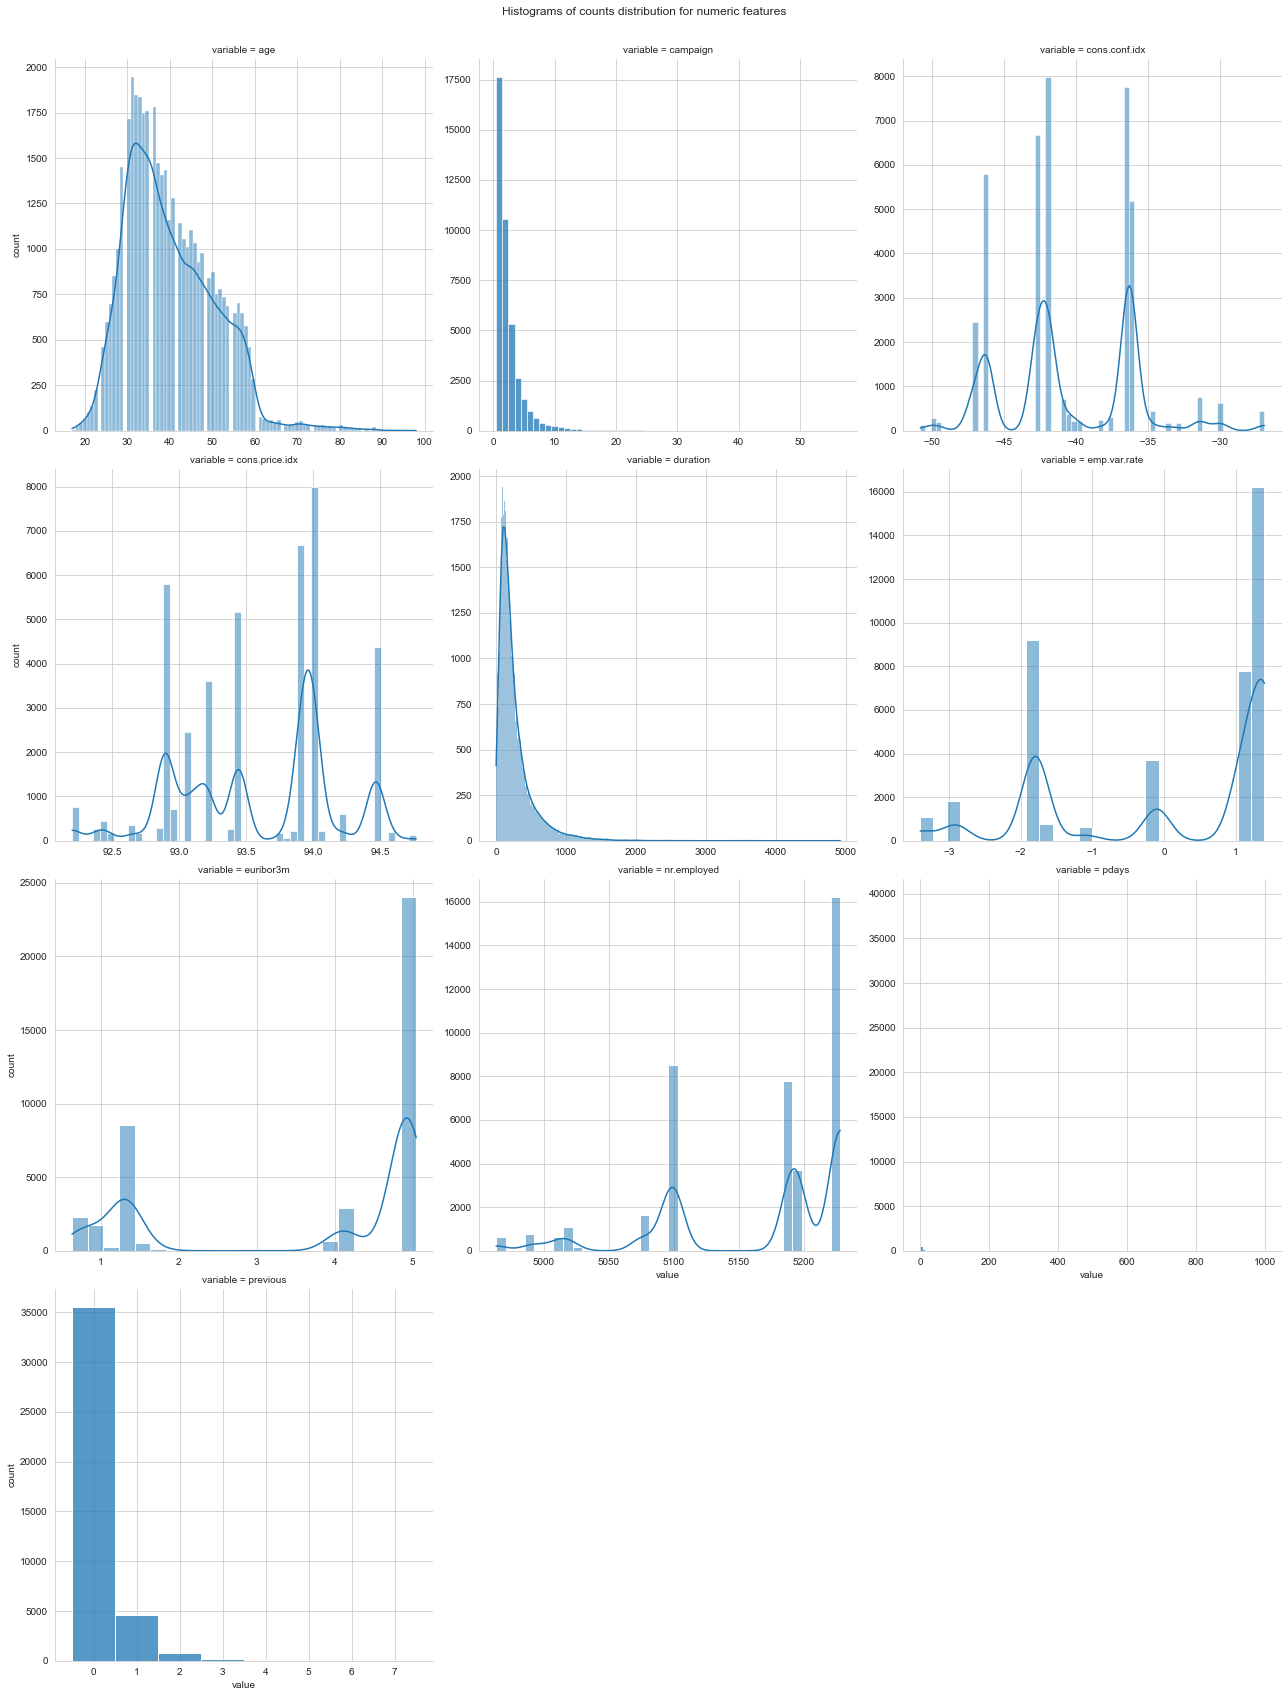

In [9]:
myplts.distplot_count_facet_grid(
    title='Histograms of counts distribution for numeric features',
    data=numeric_long_data,
    plots_for='variable',
    values_col='value',
    feature_plot_kws={
        'campaign': dict(discrete=True), 
        'pdays': dict(discrete=True), 
        'previous': dict(discrete=True)
    },
    facet_kws=dict(height=6, col_wrap=3, sharex=False, sharey=False, margin_titles=True)
)

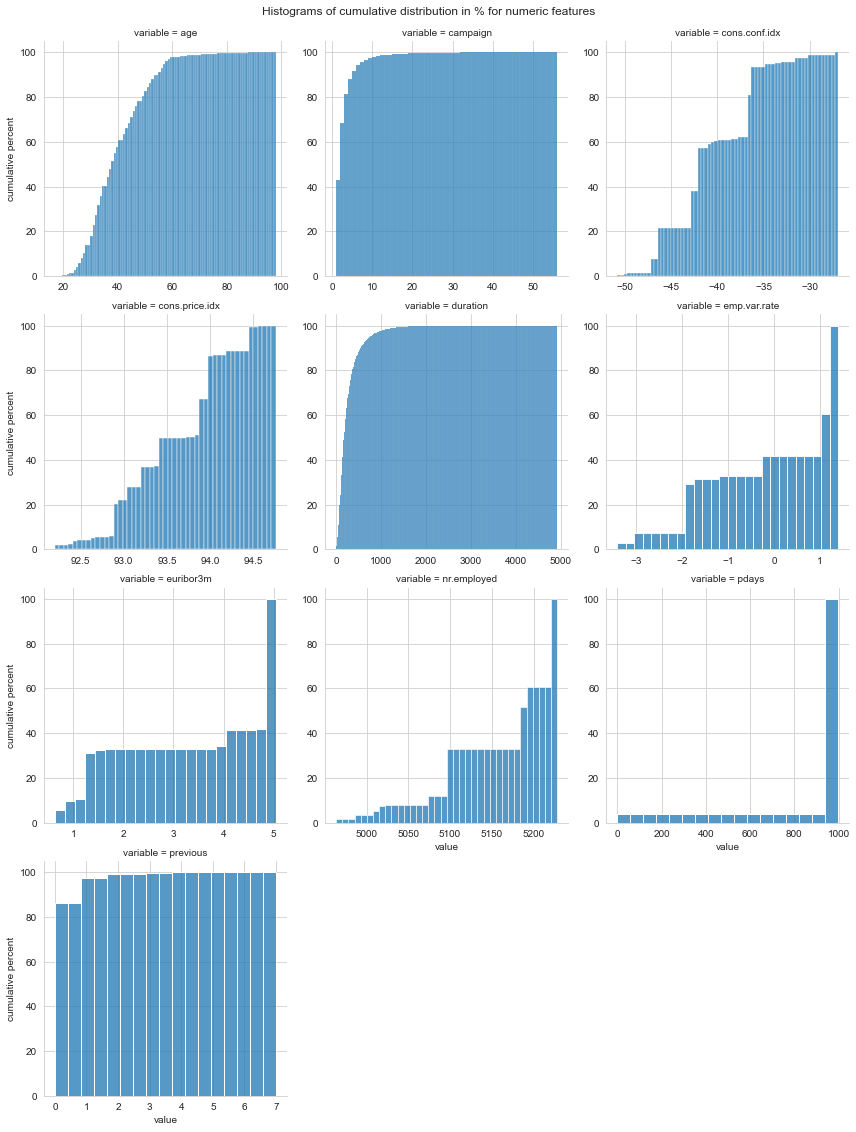

In [10]:
myplts.distplot_percent_facet_grid(
    title='Histograms of cumulative distribution in % for numeric features',
    data=numeric_long_data,
    plots_for='variable',
    values_col='value',
    feature_plot_kws={k: dict(cumulative=True, fill=True, stat='percent') for k in numeric_features},
    facet_kws=dict(height=4, col_wrap=3, sharex=False, sharey=False)
)

Now let's try describing IQR and see feature values heads and tails

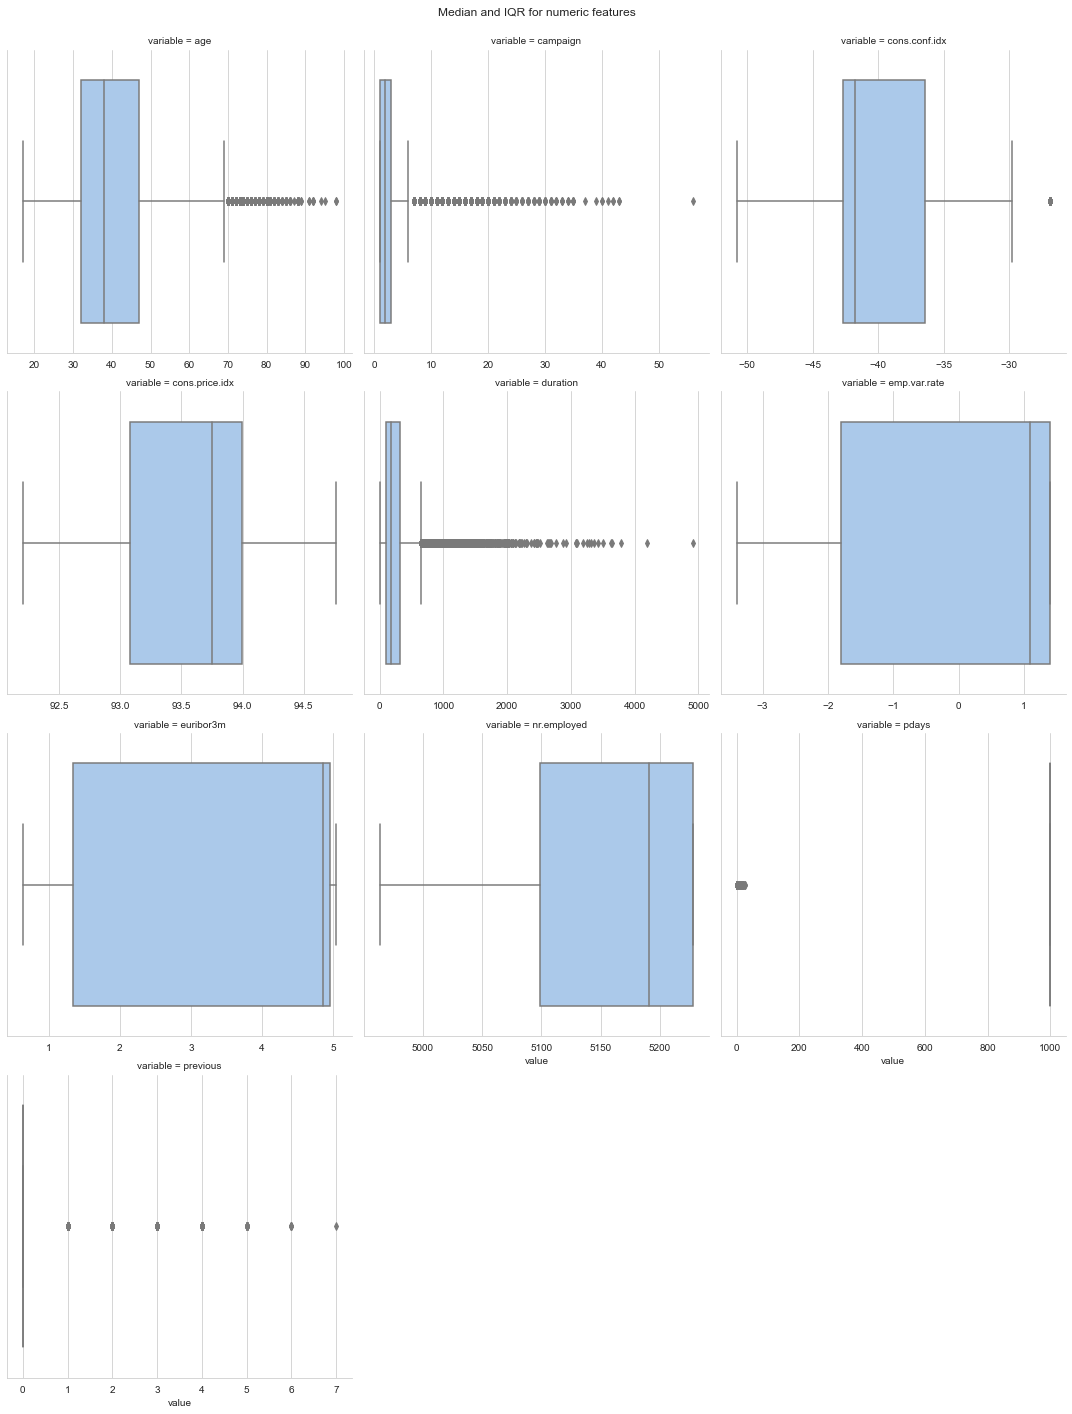

In [11]:
myplts.boxplot_facet_grid(
    title='Median and IQR for numeric features',
    data=numeric_long_data,
    plots_for='variable',
    values_col='value',
    facet_kws=dict(height=5, col_wrap=3, sharex=False, sharey=False)
)

To sum-up the box-and-whisker plots above let's calc some precise values for feautures values groups which make up the biggest part in the features under consideration.  

In [12]:
print(len(numeric_long_data[(numeric_long_data.variable=='age') & (numeric_long_data.value>=20) & (numeric_long_data.value<=60)]) / len(data))
print(len(numeric_long_data[(numeric_long_data.variable=='campaign') & (numeric_long_data.value>0) & (numeric_long_data.value<=10)]) / len(data))
print(len(numeric_long_data[(numeric_long_data.variable=='pdays') & (numeric_long_data.value==999)]) / len(data))
print(len(numeric_long_data[(numeric_long_data.variable=='previous') & (numeric_long_data.value==0)]) / len(data))
print(len(numeric_long_data[(numeric_long_data.variable=='duration') & (numeric_long_data.value>0) & (numeric_long_data.value<=1000)]) / len(data))

0.9760852675536564
0.9789016218316015
0.9632174419733903
0.8634310964358551
0.976692240458386


Let's see some stats for categorical values grouped into target classes.

In [13]:
display(data.groupby(target_feature)[(nominal_features+ordinals_features+boolean_features)].describe())

contact                            job                      marital  \
      count unique       top   freq  count unique     top  freq   count   
y                                                                         
no    36548      2  cellular  22291  36548     12  admin.  9070   36548   
yes    4640      2  cellular   3853   4640     12  admin.  1352    4640   

                           poutcome                            day_of_week  \
    unique      top   freq    count unique          top   freq       count   
y                                                                            
no       4  married  22396    36548      3  nonexistent  32422       36548   
yes      4  married   2532     4640      3  nonexistent   3141        4640   

                      education                                   month  \
    unique  top  freq     count unique                top   freq  count   
y                                                                         
no       5  mon  7667     36548      8  university.degree  10498  36548   
yes      5  thu  1045      4640      8  university.degree   1670   4640   

                       default                   housing                     \
    unique  top   freq   count unique top   freq   count unique  top   freq   
y                                                                             
no      10  may  12883   36548      3  no  28391   36548      3  yes  19069   
yes     10  may    886    4640      2  no   4197    4640      3  yes   2507   

      loan                        y                     
     count unique top   freq  count unique  top   freq  
y                                                       
no   36548      3  no  30100  36548      1   no  36548  
yes   4640      3  no   3850   4640      1  yes   4640

Let's see some counts stats for categorical values.

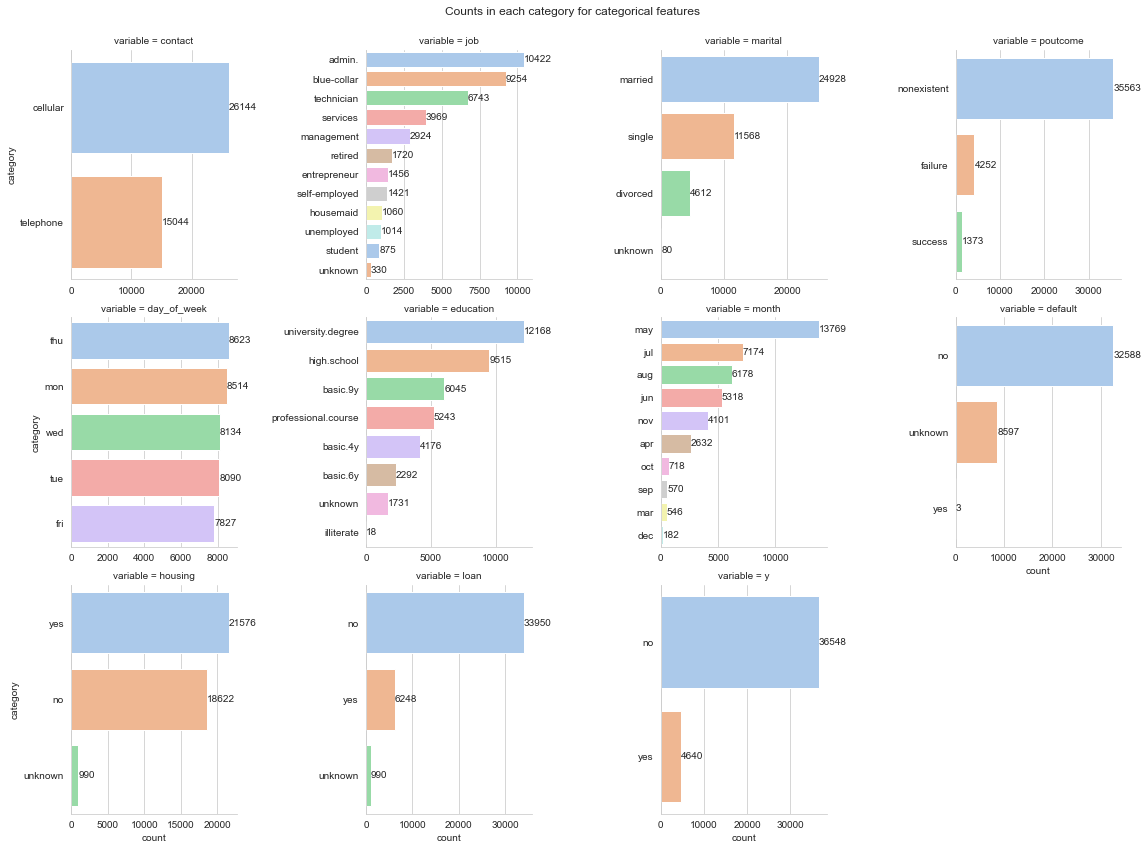

In [14]:
myplts.ordered_countplot_facet_grid(
    title='Counts in each category for categorical features',
    data=categorical_long_data, 
    plots_for='variable',
    values_col='value',
    facet_kws=dict(height=4, col_wrap=4, sharex=False, sharey=False)
)

Same as above but in percentage figures.

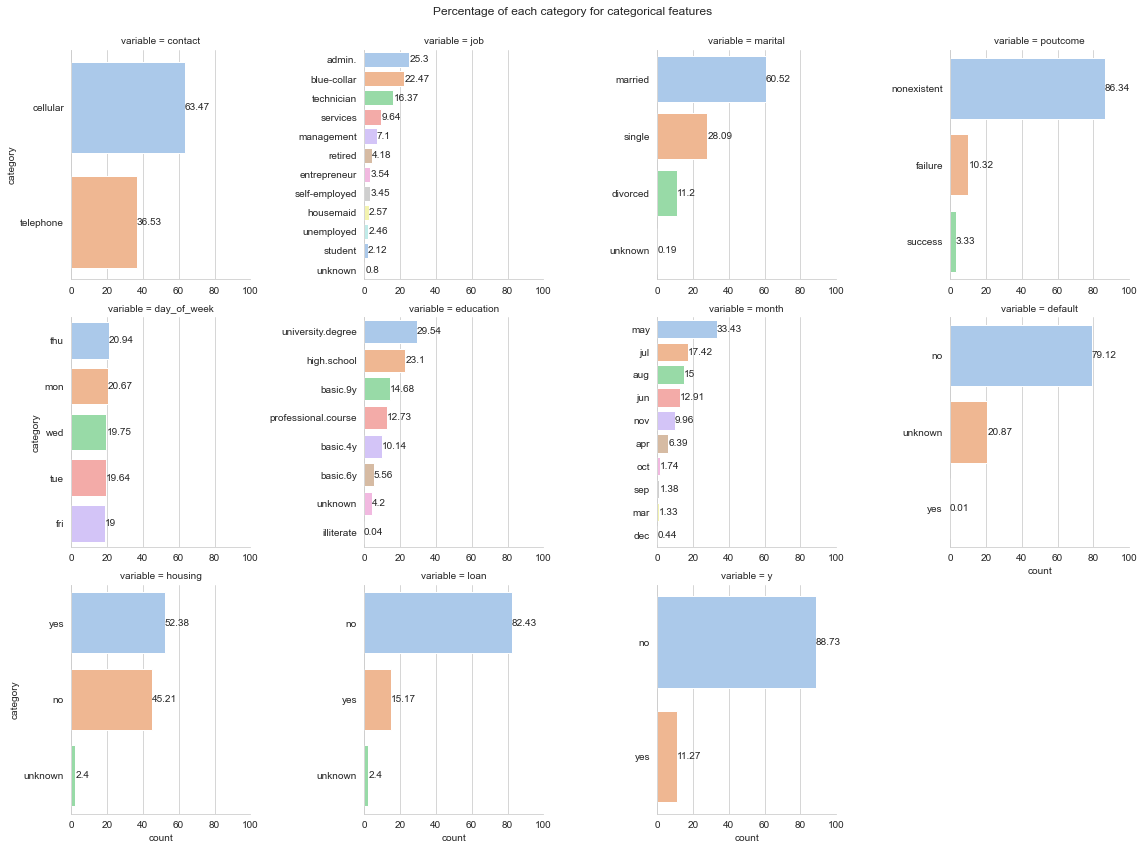

In [15]:
myplts.perc_barplot_facet_grid(
    title='Percentage of each category for categorical features',
    data=categorical_long_data, 
    plots_for='variable',
    x_col='value',
    y_col='percentage',
    facet_kws=dict(height=4, col_wrap=4, sharex=False, sharey=False)
)

Let's see the same as just above but in different form

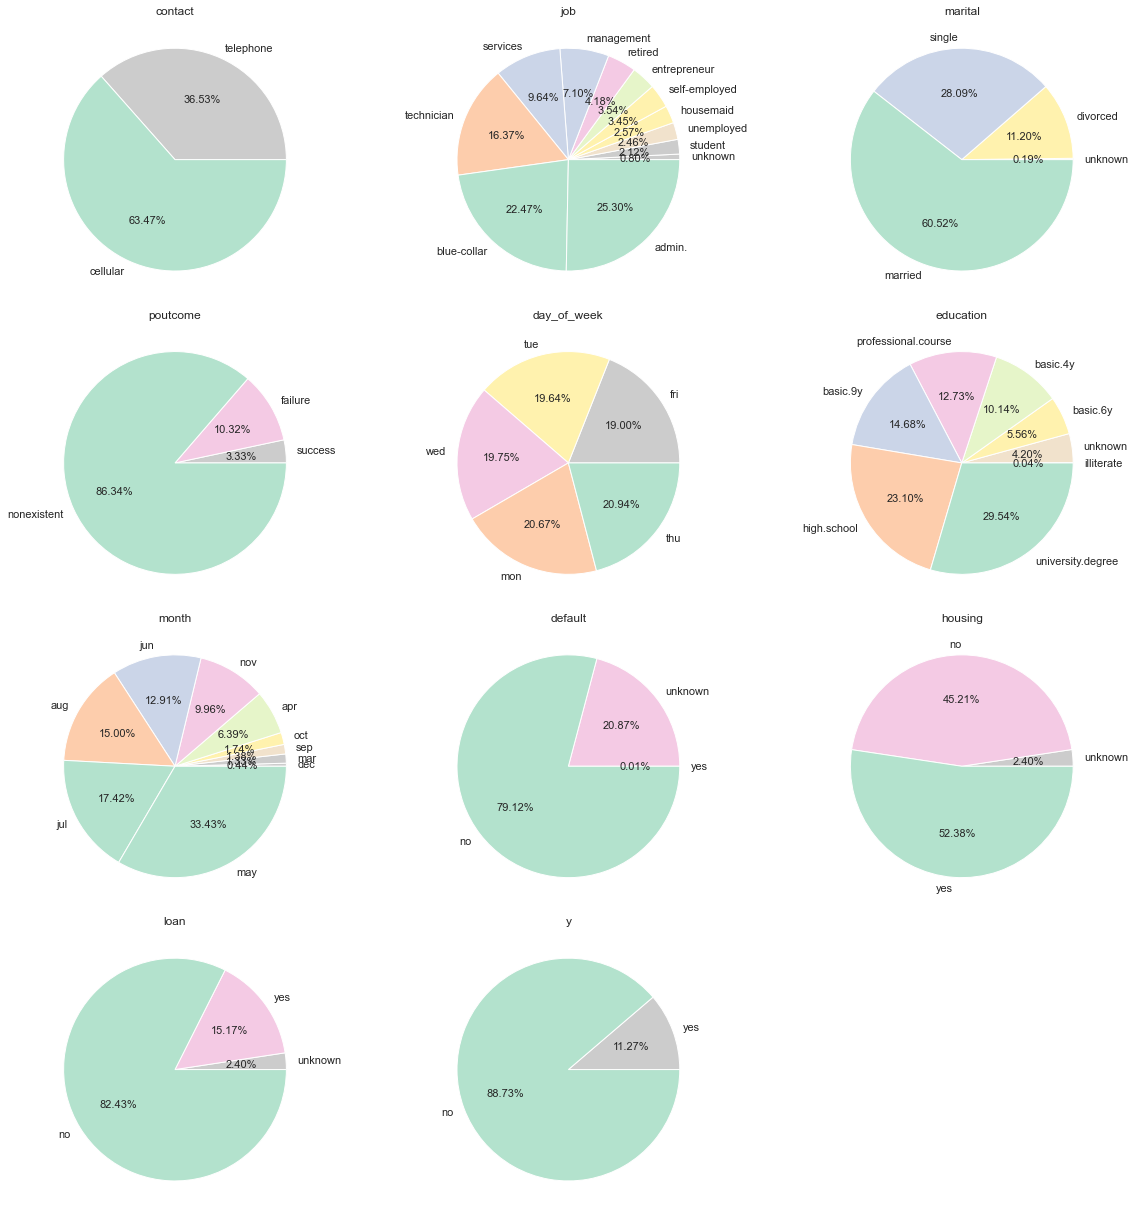

In [16]:
myplts.pies_grid(
    data, 
    features_names=(nominal_features+ordinals_features+boolean_features),
    subplots_kws=dict(figsize=(17,17))
)

### 1.1 INTERPRETATION  
1. Missing values are in features **job**, **marital**, **education**, **default**, **housing**, **loan**.
2. Vary few number of clients who subscribed a term deposit, only **11.2%**, target value y=1.
3. High amount of missing values **~21%** inside **default**.
4. **63%** of the clients were contacted using 'cellular' type in both groups.
5. **96%** of the clients were not contacted before a call (we can explore it further to see if there is a connection between contacted clients and **y**).
6. **86%** of the clients were not contacted previously before current campaign (we can explore it further to see if there is a connection between contacted clients and **y**).
7. **98%** of the clients were contacted from 1 to 10 times.
8. **98%** of the clients of age >= 20 and <= 60. Which makes sense such age groups still work, not retired, and might be interested in term deposit. Possibly, clients above 60s could be considered as "outliers" and dropped. See its relation to **y**.
9. It's hard to say something based on social and economic context attributes. But I feel like it naturally should be a relation to a target. The context values are from dense small ranges, may be there is a relation like "more ... most likely y=1".
10. There are gaps in **age** groups evengly distributed among 10s of ages.
11. A lot of management and technician clients.
12. Most clients are married.
13. Most clients are not defaulted in past.
14. More than 50% o the clients have taken housing loan.
15. Most of the clients were last contacted in the month of May.

## 1.2 Multivariate analysis 
1. consider features in pairs
2. try to introduce new features to consider their relationship with other features
3. etc. 

Bin clients into age groups by 10s. To see what are the relations between each group and other features.

In [119]:
data['age_under20s'] = data['age'] < 20
data['age_20s'] = (data['age'] >= 20) & (data['age'] < 30)
data['age_30s'] = (data['age'] >= 30) & (data['age'] < 40)
data['age_40s'] = (data['age'] >= 40) & (data['age'] < 50)
data['age_50s'] = (data['age'] >= 50) & (data['age'] < 60)
data['age_60s'] = (data['age'] >= 60) & (data['age'] < 70)
data['age_70s'] = (data['age'] >= 70) & (data['age'] < 80)
data['age_above80s'] = data['age'] >= 80

data['age_group'] = data.filter(regex="age_.*\d\ds", axis=1).apply(lambda r: r[r].index[0], axis=1)

Introduce new feature showing whether a client was contacted or not 

In [129]:
data['is_contacted'] = data['pdays'] != 999

Binarize target

In [146]:
target_feature_bin = target_feature[0]+'_binary'
data[target_feature[0]+'_binary'] = np.where(data[target_feature[0]]=='yes', 1, 0)

Consider features in pairs grouping data by target value 

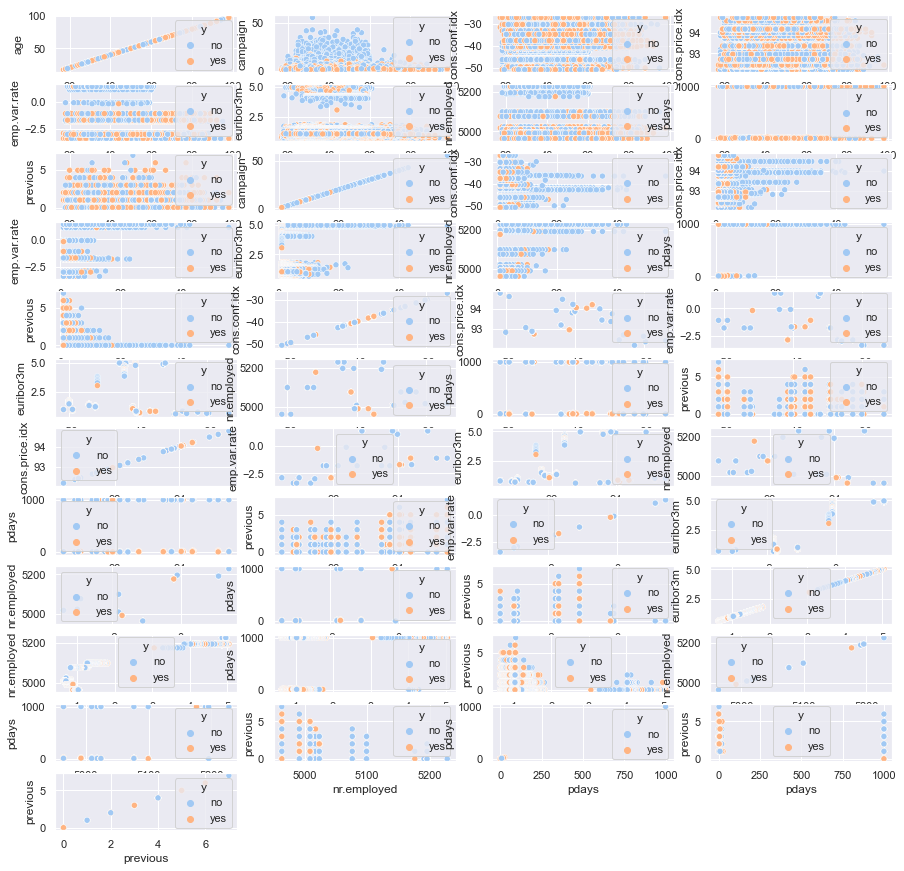

In [224]:
# ToDo fix fig sizes!
# Find the most correlated/related and then build scatter plots from those features
sns.set()
myplts.paired_scatter_plots(
    data, 
    numeric_consider_features, 
    group_sz=4,
    scatter_plot_kws=dict(hue=target_feature[0]),
    subplots_kws=dict(figsize=(15,15))
)
plt.figure(figsize=(14, 8))
plt.show()

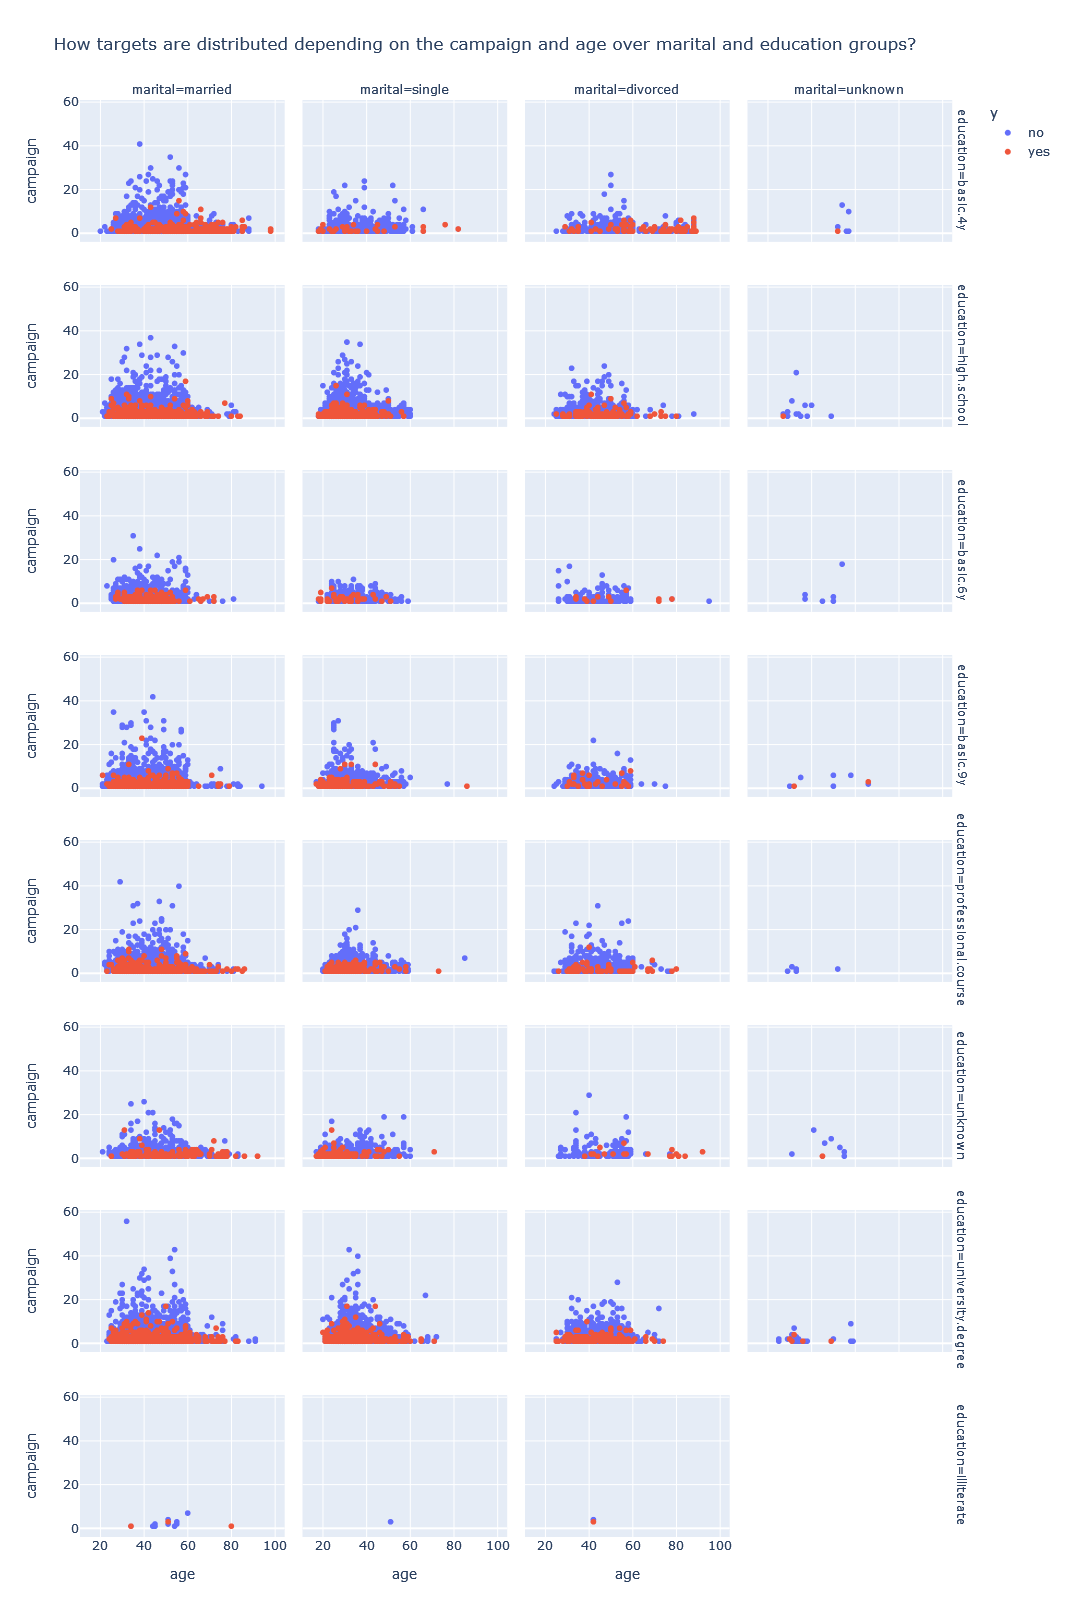

In [15]:
px.scatter(
    data, x="age", y="campaign", color=target_feature[0], facet_col="marital", facet_row="education",
    width=1600, height=1600,
    title="How targets are distributed depending on the campaign and age over marital and education groups?"
)

In [64]:
medians = data.groupby(target_feature[0])[numeric_consider_features].median().reset_index()
medians

,y,age,campaign,cons.conf.idx,cons.price.idx,emp.var.rate,euribor3m,nr.employed,pdays,previous
0,no,38.0,2.0,-41.8,93.918,1.1,4.857,5195.8,999.0,0.0
1,yes,37.0,2.0,-40.4,93.200,-1.8,1.266,5099.1,999.0,0.0


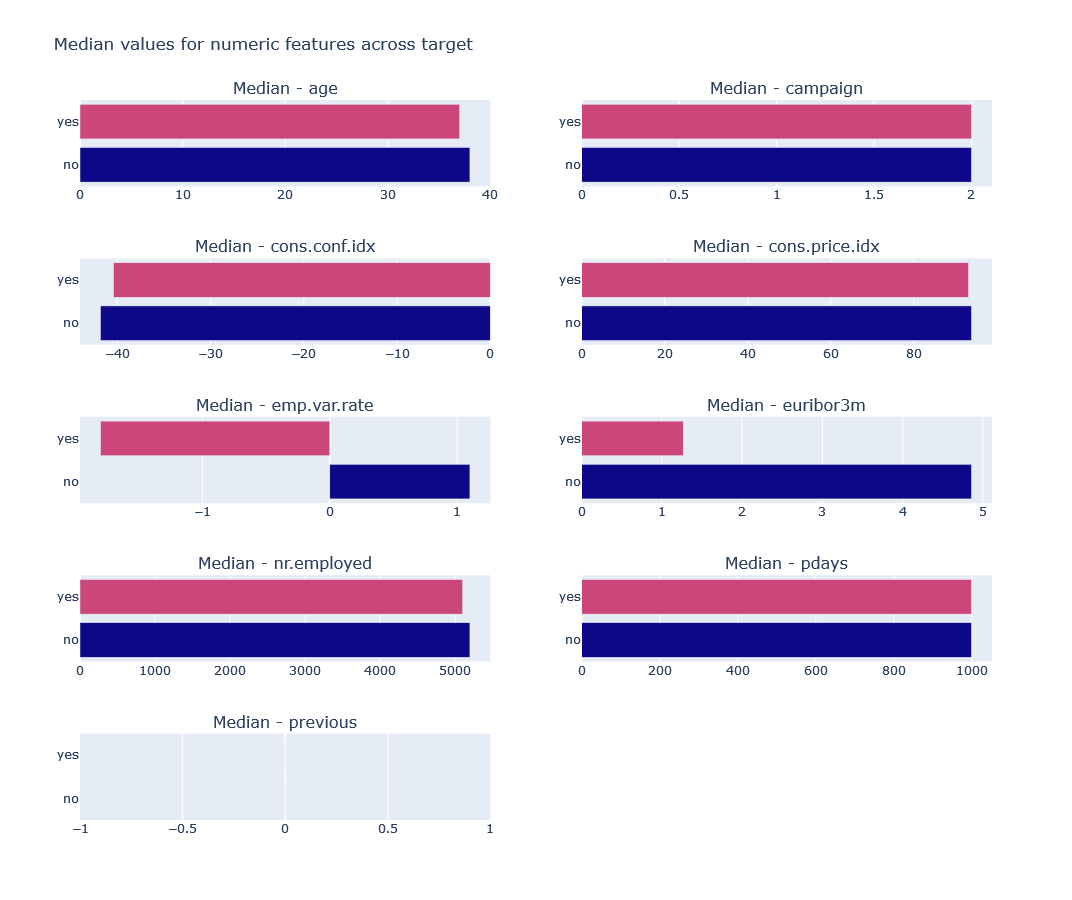

In [65]:
myplts.plx_bars(data=medians, x_features_names=numeric_consider_features, y_name=target_feature[0], cols=2)

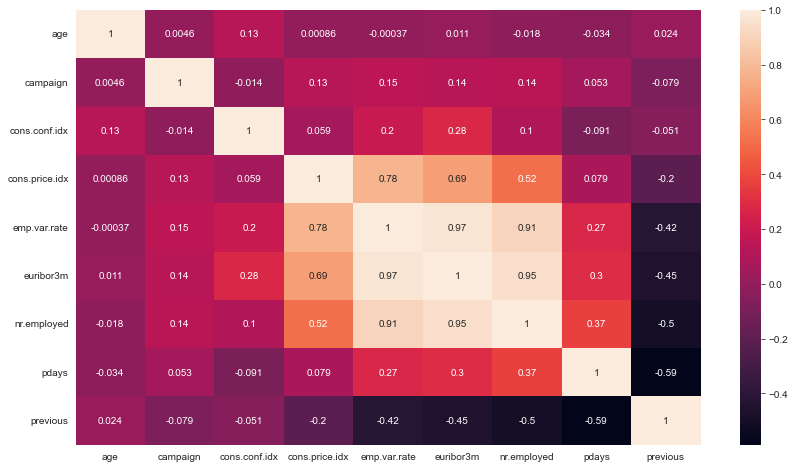

In [203]:
"""It doesn't make sense since all numeric variables are neither normally 
distributed nor linear, nor follow homoscedasticity. Thier continous nature also is a question.

But let's try checking for a linear dependence.
"""
plt.figure(figsize=(14, 8))
sns.heatmap(data[numeric_consider_features].corr(method='pearson'), annot=True)
plt.show()

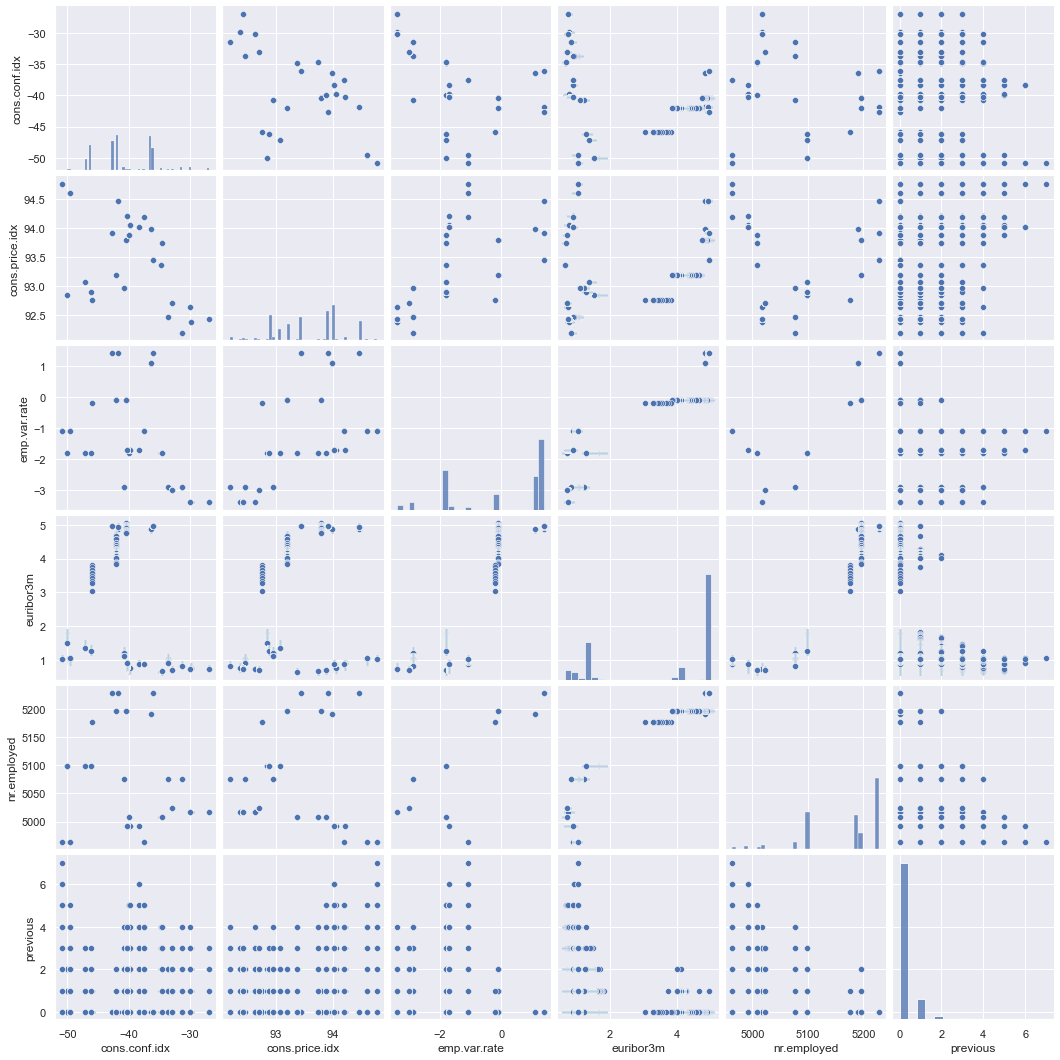

In [219]:
sns.set()
sns.pairplot(data[['cons.conf.idx', 'cons.price.idx', 'emp.var.rate', 'euribor3m', 'nr.employed', 'previous']], height=2.5)
plt.show()

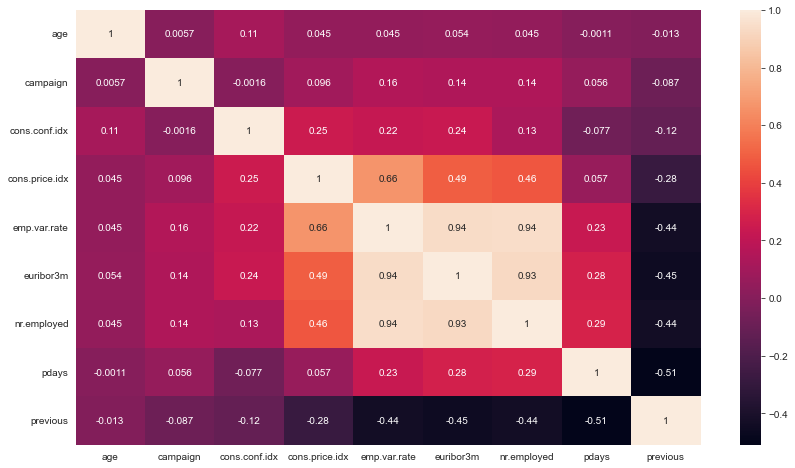

In [202]:
"""
The Spearman rank correlation test does not carry any assumptions about the distribution of 
the data and is the appropriate correlation analysis when the variables are measured on a 
scale that is at least ordinal.
But the assumptions of the Spearman correlation are that data must be at least ordinal and 
the scores on one variable must be monotonically related to the other variable.
Note. we can eplore assosiation between other ordinal variables, but have to convert them into ordered numbers.
"""
plt.figure(figsize=(14, 8))
sns.heatmap(data[numeric_consider_features].corr(method='spearman'), annot=True)
plt.show()

Calculate Cramer V assosiation between our categorical variables

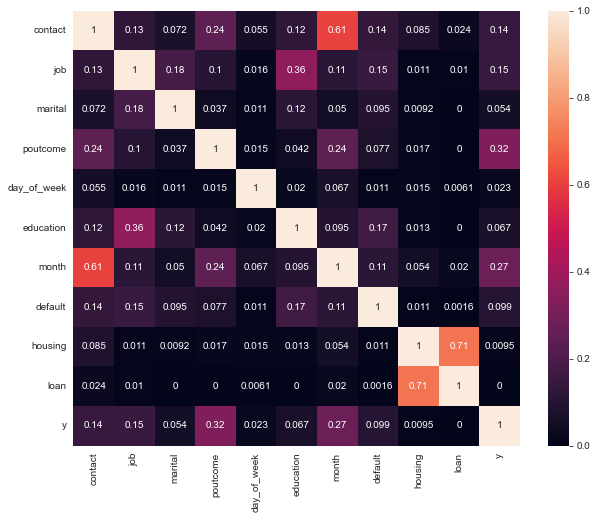

In [201]:
plt.figure(figsize=(10, 8))

sns.heatmap(
    myrels.cramers_v_pairwise(data, all_cats_features), 
    annot=True, 
    xticklabels=all_cats_features, 
    yticklabels=all_cats_features
)
plt.show()

In [120]:
myrels.cramers_v(data['age_group'], data[target_feature[0]])

0.1810997325319688

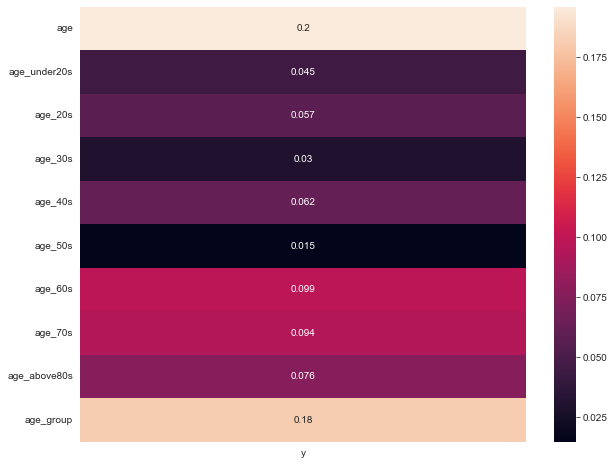

In [200]:
age_cols = data.filter(regex="age_*", axis=1).columns
        
plt.figure(figsize=(10, 8))

sns.heatmap(
    myrels.cramers_v_pairwise(data, age_cols, target_feature), 
    annot=True, 
    xticklabels=target_feature, 
    yticklabels=age_cols
)
plt.show()

In [142]:
print(myrels.cramers_v(data[data.is_contacted]['pdays'], data[target_feature[0]]))
print(myrels.cramers_v(data['pdays'], data[target_feature[0]]))

0.14673445552496403
0.3288570640060341


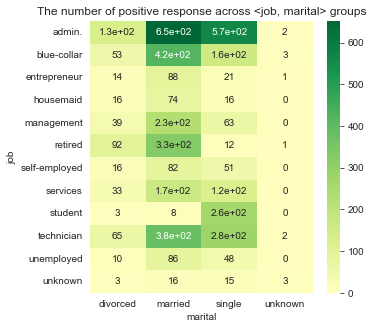

In [199]:
plt.figure(figsize=(5, 5))

sns.heatmap(
    pd.pivot_table(data=data, index='job', columns='marital', values=target_feature_bin, aggfunc=np.sum),
    annot=True,
    cmap='RdYlGn',
    center=0.10
).set_title('The number of positive response across <job, marital> groups')
plt.show()

Same but in percentage so we could see "positives" proportion in each group

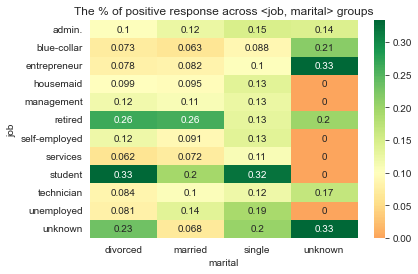

In [198]:
sns.heatmap(
    pd.pivot_table(data=data, index='job', columns='marital', values=target_feature_bin, aggfunc=np.mean),
    annot=True,
    cmap='RdYlGn',
    center=0.10
).set_title('The % of positive response across <job, marital> groups')
plt.show()

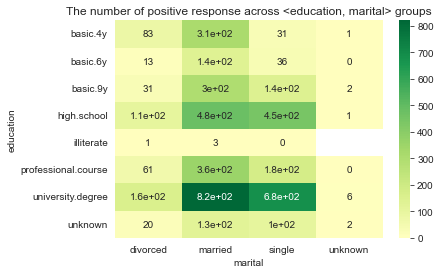

In [197]:
sns.heatmap(
    pd.pivot_table(data=data, index='education', columns='marital', values=target_feature_bin, aggfunc=np.sum),
    annot=True,
    cmap='RdYlGn',
    center=0.10
).set_title('The number of positive response across <education, marital> groups')
plt.show()

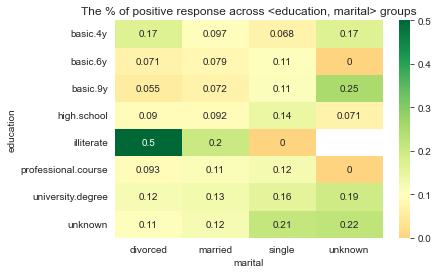

In [196]:
sns.heatmap(
    pd.pivot_table(data=data, index='education', columns='marital', values=target_feature_bin, aggfunc=np.mean),
    annot=True,
    cmap='RdYlGn',
    center=0.10
).set_title('The % of positive response across <education, marital> groups')
plt.show()

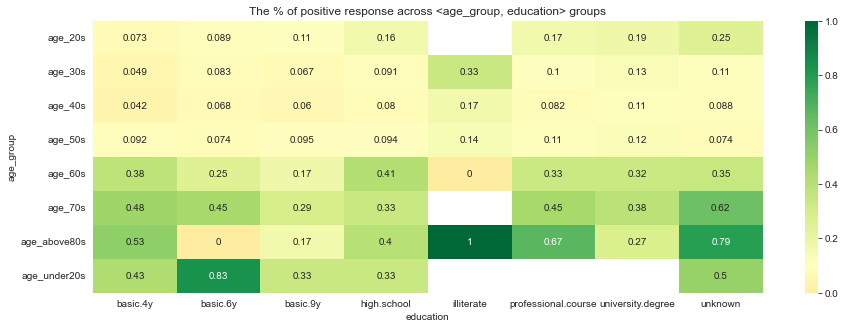

In [195]:
plt.figure(figsize=(15, 5))
sns.heatmap(
    pd.pivot_table(data=data, index='age_group', columns='education', values=target_feature_bin, aggfunc=np.mean),
    annot=True,
    cmap='RdYlGn',
    center=0.10
).set_title('The % of positive response across <age_group, education> groups')
plt.show()

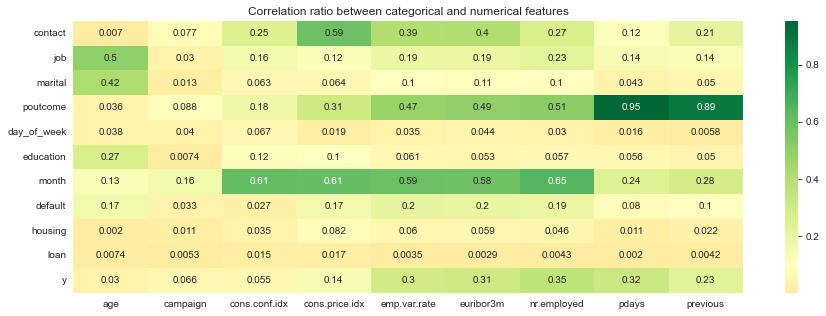

In [194]:
plt.figure(figsize=(15, 5))
sns.heatmap(
    myrels.correlation_ratio_pairwise(data, all_cats_features, numeric_consider_features),
    annot=True,
    cmap='RdYlGn',
    center=0.10,
    xticklabels=numeric_consider_features, 
    yticklabels=all_cats_features
).set_title('Correlation ratio between categorical and numerical features')
plt.show()

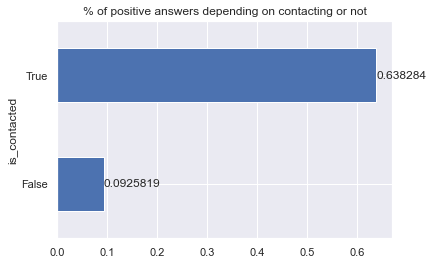

In [226]:
ax = (
    data.groupby('is_contacted')[target_feature_bin]
    .mean()
    .plot
    .barh(title='% of positive answers depending on contacting or not')
)
ax.bar_label(ax.containers[0])
plt.show()

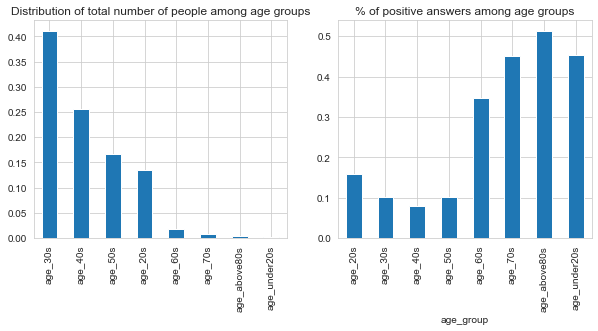

In [214]:
plt.figure(figsize = [10,4])
plt.subplot(1,2,1)
data.age_group.value_counts(normalize=True).plot.bar(title='Distribution of total number of people among age groups')
plt.subplot(1,2,2)
data.groupby(['age_group'])[target_feature_bin].mean().plot.bar(title='% of positive answers among age groups')
plt.show()

In [231]:
pd.crosstab(data.is_contacted, data.y)

y,no,yes
is_contacted,,
False,36000,3673
True,548,967


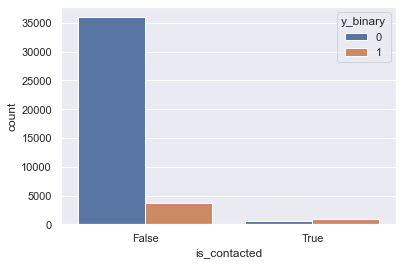

In [236]:
sns.countplot(x="is_contacted", hue=target_feature_bin, data=data);

In [235]:
# We could check hypethesis "Is that true people of age 30s tend to agree more oftern than others?"
pd.crosstab(data.age_group, data.y, margins=True, margins_name="Total")

y,no,yes,Total
age_group,,,
age_20s,4706,888,5594
age_30s,15223,1715,16938
age_40s,9692,834,10526
age_50s,6165,697,6862
age_60s,473,251,724
age_70s,175,144,319
age_above80s,73,77,150
age_under20s,41,34,75
Total,36548,4640,41188


In [234]:
"""For some reasons in may there is the biggest number of responses and hanse the biggest number of contacts. 
May be this is related to business days and economic somehow
"""
pd.crosstab(data.month, data.y, margins=True, margins_name="Total")

y,no,yes,Total
month,,,
apr,2093,539,2632
aug,5523,655,6178
dec,93,89,182
jul,6525,649,7174
jun,4759,559,5318
mar,270,276,546
may,12883,886,13769
nov,3685,416,4101
oct,403,315,718


### 1.2 INTERPRETATION  
1. We can clearly see that clients who agreed were contacted not more than ~10 times during this campaign among all marital and education groups.
2. According to Spearman corr we observe that there is a strong relationship between (which makes sense as they are global ecomonic indicators)
    **emp.var.rate** <-> **cons.price.idx**  
    **emp.var.rate** <-> **euribor3m**  
    **nr.employed** <-> **euribor3m**  
    **nr.employed** <-> **emp.var.rate**  
    **nr.employed** <-> **cons.price.idx**  
    **euribor3m**  <-> **cons.price.idx** 
3. According to Cramer V there is some relationship between 
   **month** and **contact**  
   **loan** and **housing**  
   **month** and y    
   **job** and **y**.
4. Also we see that the outcome of the previous marketing campaign **poutcome** affects target var. It means that client who agreed previously tend to agree during the current campaign.
5. There is a relation between ages groups and target.
6. From the correlation ratio table we can conclude that there is a relation between previous/pdays and poutcome, and others. Notably, economic and social context relates to month and seems all economic features are depended to each other. Target depends on emp.var.rate, euribor3m, rr.employed, pdays, previous.
7. For example, we could predict our target just by looking at **is_contacted** feature and in 64% of cases it sould be a correct answer.

# Part 2: Data preprocessing
Prepare data to dimensionality reduction step: 
1. Fill missing values.
2. Deal with outliers.
3. Prepare categorical data.


In [ ]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

# Questions
1. How best visualize billions of points and tens of features? E.g. for big data.
2. Do I really need plots for all pairs?
3. What can be done better?
4. What can be done on "anomalies" detection?
5. 